# Описание проекта
Задача: на основе данных о продаже компьютерных игр до 2016 года, выявить закономерности обуславливающие успешность игр. Данные закономерности должны позволить интернет-магазину "Стримчик" спланировать развитие на 2017 год

# Дополнительная информация
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Шаг 1. Изучение общей информации о данных

In [1]:
# импорт библиотек и настройка notebook'a
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format ='{:,.2f}'.format
import warnings
warnings.simplefilter('ignore')
import scipy.stats as st

In [2]:
# открытие файла
try:
    games = pd.read_csv('/datasets/games.csv')
except FileNotFoundError:
    games = pd.read_csv('games.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
print('Кол-во полных дубликатов записей: ', games.duplicated().sum())

Кол-во полных дубликатов записей:  0


<b>Вывод:</b> Данные открыты. Всего записей - 16715 шт. Есть столбцы с большим кол-вом пропусков. Присутствуют некорректные названия столбцов. У ряда столбцов следует изменить формат. Полных дубликатов в данных нет

# Шаг 2. Подготовка данных

In [6]:
# корректировка названий столбцов
games = games.rename(columns={
    'Name': 'name',
    'Platform': 'platform',
    'Year_of_Release': 'year_of_release',
    'Genre': 'genre',
    'NA_sales': 'na_sales',
    'EU_sales': 'eu_sales',
    'JP_sales': 'jp_sales',
    'Other_sales': 'other_sales',
    'Critic_Score': 'critic_score',
    'User_Score': 'user_score',
    'Rating': 'rating'
})

<b>'name' и 'platform'</b>

In [7]:
print('Кол-во уникальных игр: ', len(games['name'].unique()))
print('Кол-во уникальных платформ: ', len(games['platform'].unique()))

Кол-во уникальных игр:  11560
Кол-во уникальных платформ:  31


В столбцах 'name' и 'platform' данные буквенные. Тип 'object'. Оставляем

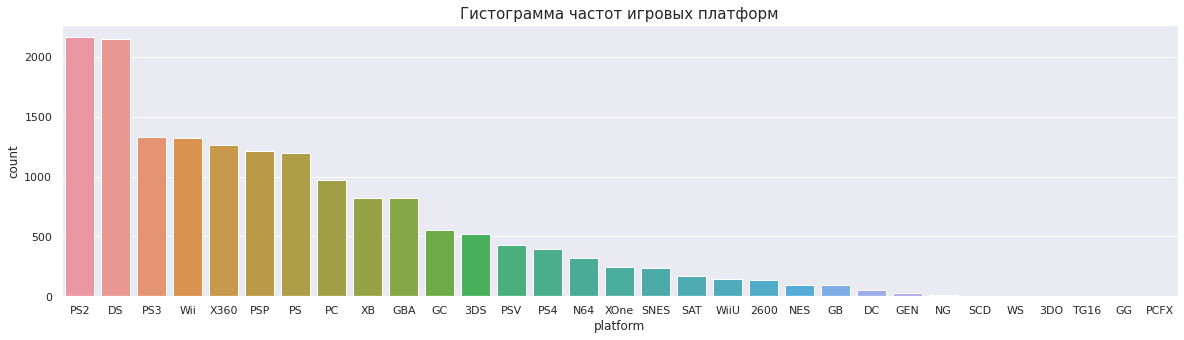

In [8]:
plt.figure(figsize=(20, 5))
sns.set()
sns.countplot(data=games, x='platform', order=games['platform'].value_counts().index)
plt.title('Гистограмма частот игровых платформ', fontsize=15)
plt.show()

<b>'year_release'</b>

В столбце 'year_release' тип float избыточен. Анализируем пропуски 

In [9]:
missing = games['year_of_release'].isna().sum()
print('Кол-во пропусков: ', missing)
print(f'Процент от общего кол-ва записей: {missing / len(games):.2f}%')

games[games['year_of_release'].isna()].head()

Кол-во пропусков:  269
Процент от общего кол-ва записей: 0.02%


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [10]:
# изменяем тип данных
games['year_of_release'] = games['year_of_release'].astype('Int64')

In [11]:
def show_hists(data, data_label, num_bins, rug=False, log_scale=False):
    sns.set()
    f, axes = plt.subplots(1, 2, figsize=(20, 5))
    axes[0].set_title(data_label + ". Плотность распределения", fontsize=15)
    axes[0].set_ylabel('плотность', fontsize=15)
    sns.distplot(data, bins=num_bins, rug=rug, ax=axes[0])
    axes[1].set_title(data_label + ". Распределение частот", fontsize=15)
    axes[1].set_ylabel('количество', fontsize=15)
    sns.distplot(data, bins=num_bins, kde=False, ax=axes[1])
    plt.show()

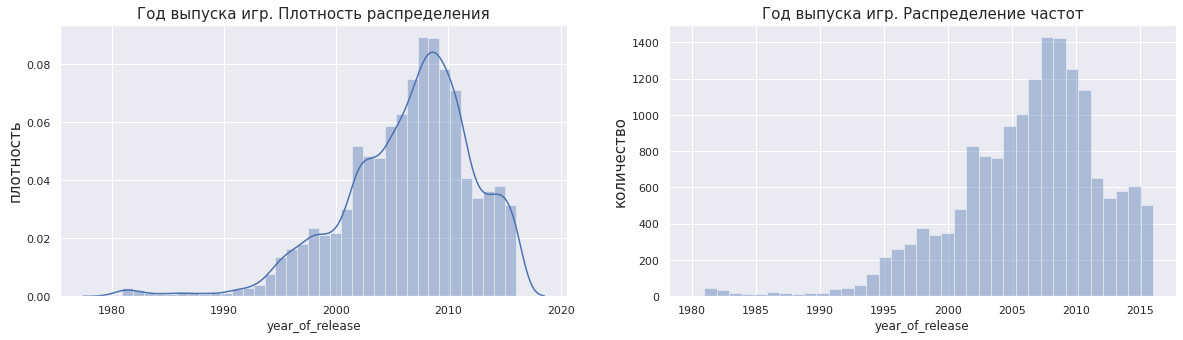

In [12]:
show_hists(games[~games['year_of_release'].isna()]['year_of_release'], 'Год выпуска игр', num_bins=37)

Пропуски в столбце 'year_release' предлагаю оставить. Восстановить их врятли получится, даже если учитывать год в названии игры, многие игры выходят зачастую до или после года, указанного в названии. Если их заменять на 0 или другие числовые значения, то они искозят дальнейший анализ. Nan же просто не будут учитываться, а записи мы пока сохраним

Из диаграмм мы видим, что до 1990 года игр выпускалось очень мало. Также хорошо виден большой спад после 2010 года. Основные данные находятся между 2000-2010 годами

<b>'genre'</b>

In [13]:
games['genre'].isna().sum()

2

In [14]:
games[games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Жанр пропущен у двух записей. Как видим выше в данных записях мало полезного. Удаляем

In [15]:
games = games.dropna(subset=['genre'])

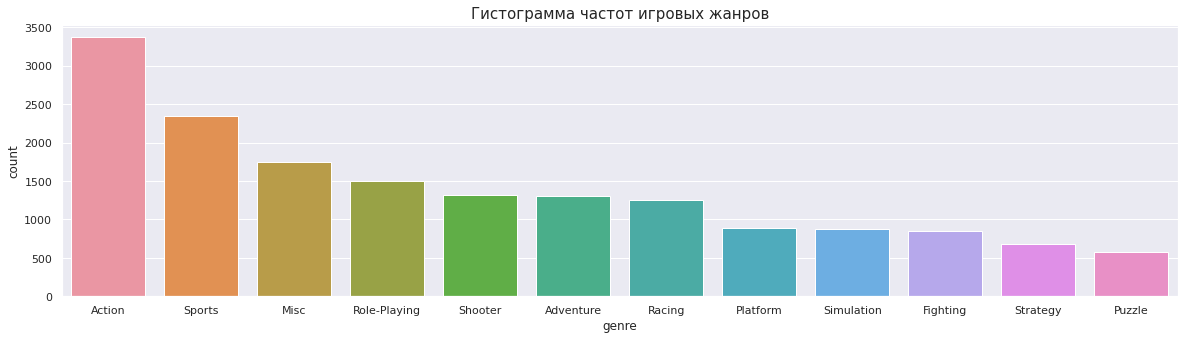

In [16]:
plt.figure(figsize=(20, 5))
sns.set()
sns.countplot(data=games, x='genre', order=games['genre'].value_counts().index)
plt.title('Гистограмма частот игровых жанров', fontsize=15)
plt.show()

In [17]:
print('Кол-во уникальных жанров:', len(games['genre'].unique()))

Кол-во уникальных жанров: 12


Наибольшая популярность игр в жанре action и спорт, стратегии и пазлы наименее популярны. Распределение в таблице вполне соответствует реальности

<b>'na_sales', 'eu_sales', 'jp_sales', 'other_sales'</b>

In [18]:
games['na_sales'].describe()

count   16,713.00
mean         0.26
std          0.81
min          0.00
25%          0.00
50%          0.08
75%          0.24
max         41.36
Name: na_sales, dtype: float64

Среднее значение составляет 0.26, а медиана - 0.08. Данные сильно скошены вправо.
Нормальные значения находятся до (0.24-0.0)*1.5+0.24 = 0.6. Большинство игр в Северной Америке продаются до 600тыс. копий, но гиперпопулярные игры сильно смещают данные на себя.

In [19]:
print('Доля выбросов в Северной америке в общей выборке: ', 
      round(len(games[games['na_sales'] > 0.6]) / len(games['na_sales']) * 100, 1), '%')

Доля выбросов в Северной америке в общей выборке:  10.1 %


In [20]:
games['eu_sales'].describe()

count   16,713.00
mean         0.15
std          0.50
min          0.00
25%          0.00
50%          0.02
75%          0.11
max         28.96
Name: eu_sales, dtype: float64

Среднее значение составляет 0.15, а медиана - 0.02. Данные сильно скошены вправо. Нормальные значения находятся до (0.11-0.0)*1.5+0.11 = 0.275. Большинство игр в Европе продаются до 275тыс. копий, но гиперпопулярные игры сильно смещают данные на себя.

In [21]:
print('Доля выбросов в Европе в общей выборке: ', 
      round(len(games[games['eu_sales'] > 0.275]) / len(games['eu_sales']) * 100, 1), '%')

Доля выбросов в Европе в общей выборке:  12.3 %


In [22]:
games['jp_sales'].describe()

count   16,713.00
mean         0.08
std          0.31
min          0.00
25%          0.00
50%          0.00
75%          0.04
max         10.22
Name: jp_sales, dtype: float64

Среднее значение составляет 0.08, а медиана - 0.00. Данные сильно скошены вправо. Нормальные значения находятся до (0.04-0.0)*1.5+0.04 = 0.1. Большинство игр в Европе продаются до 100тыс. копий, но гиперпопулярные игры сильно смещают данные на себя.

In [23]:
print('Доля выбросов в Японии в общей выборке: ', 
      round(len(games[games['jp_sales'] > 0.1]) / len(games['jp_sales']) * 100, 1), '%')

Доля выбросов в Японии в общей выборке:  14.6 %


In [24]:
games['other_sales'].describe()

count   16,713.00
mean         0.05
std          0.19
min          0.00
25%          0.00
50%          0.01
75%          0.03
max         10.57
Name: other_sales, dtype: float64

Среднее значение составляет 0.05, а медиана - 0.01. Данные сильно скошены вправо. Нормальные значения находятся до (0.03-0.0)*1.5+0.03 = 0.075. Большинство игр в остальном мире продаются до 75тыс. копий, но гиперпопулярные игры сильно смещают данные на себя.

In [25]:
print('Доля выбросов в остальном мире в общей выборке: ', 
      round(len(games[games['other_sales'] > 0.075]) / len(games['other_sales']) * 100, 1), '%')

Доля выбросов в остальном мире в общей выборке:  13.4 %


<b>Предварительный вывод по продажам: </b>данные по всем представленным локациям сильно скошены вправо из-за выбросов гиперпопулярных игр. Процент выбросов составляет от 10-15%. Самый большой процент выборосов в Японии. Процент выбросов очень большой, их нельзя удалять из общей выборки. Также стоит отметить огромное кол-во околонулевых продаж. Нулевые продажи должны быть очень цены для дальнейшего анализа перспективных продаж. Держим в голове данные показатели в процессе последующего анализа 

<b>'critic_score', 'user_score'</b>

In [26]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [27]:
games[games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В данном столбце дробной части нет. Переводим в тип Int. Пропуски оставляем как есть. Во первых они существенная часть датасета, во вторых восполнить мы ее никак не можем, так как пропуски для разлиных игр, платформ и времени издания. Так что с пропусками необходимо идти к разработчиткам и спрашивать где остальная часть. Но мы этого конечно сделать не сможем.

In [28]:
games['critic_score'] = games['critic_score'].astype('Int64')

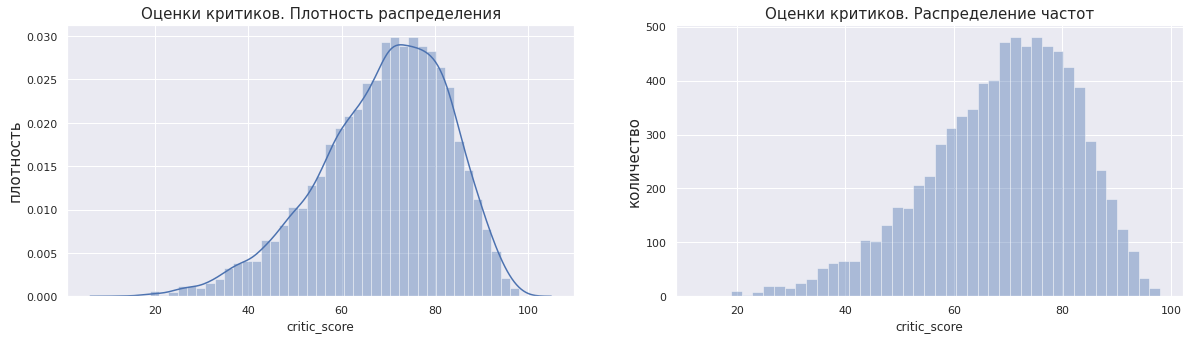

In [29]:
show_hists(games[~games['critic_score'].isna()]['critic_score'], 'Оценки критиков', num_bins=43)

In [30]:
games['critic_score'].describe()

count   8,137.00
mean       68.97
std        13.94
min        13.00
25%        60.00
50%        71.00
75%        79.00
max        98.00
Name: critic_score, dtype: float64

Данные оценок критиков немного смещены влево. В целом распределены нормально. Влияние выбросов несильное

In [31]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [32]:
print('Кол-во tbd: ', games.loc[games['user_score'] == 'tbd']['user_score'].count())
print('Кол-во Nan: ', games['user_score'].isna().sum())

Кол-во tbd:  2424
Кол-во Nan:  6699


В столбце 'user_score' в целом ситуация аналогична 'critic_score'. Но в отличии от 'critic_score' используется дробная часть. Поэтому приведем тип к float, А пропуски оставим по аналогичной выше причине

Также в столбце имеются значения tbd. То есть оценки еще нет. Кол-во подобных записей 2,5тыс. Так как угадать данное значение мы не можем, взять на его неоткуда. Вопросы мы задать не можем, то мне логичней всего кажется их перезаписать как nan. Кол-во Nan все равно почти 7тыс. записей.

In [33]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan
games['user_score'] = games['user_score'].astype('float64')

In [34]:
games['user_score'].describe()

count   7,590.00
mean        7.13
std         1.50
min         0.00
25%         6.40
50%         7.50
75%         8.20
max         9.70
Name: user_score, dtype: float64

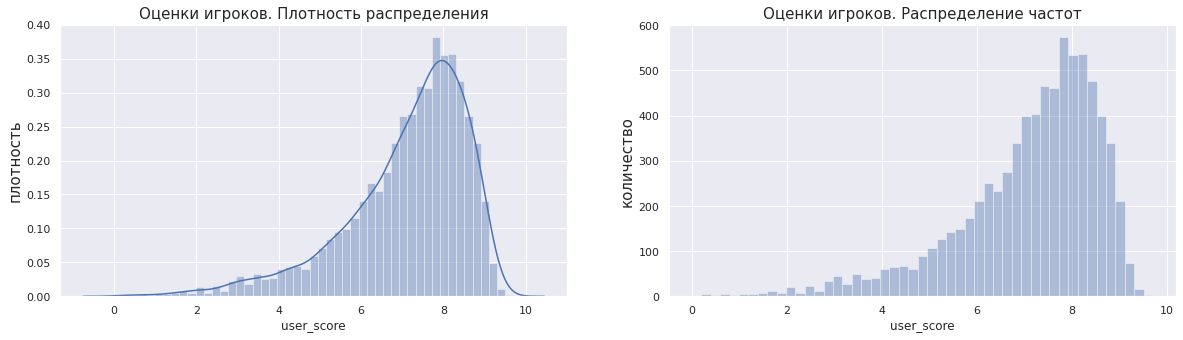

In [35]:
show_hists(games[~games['user_score'].isna()]['user_score'], 'Оценки игроков', num_bins=49)

<b>Предварительный вывод по оценкам критиков и пользователей: </b>в целом данные рспределены нормально. В обоих распределениях есть небольшое смещение в сторону высоких оценок. На общую картину не должно повлиять.

<b>'rating'</b>

In [36]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Из найденной в интернете (https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board)
- «E» («Everyone») — «Для всех»
- «M» («Mature») — «Для взрослых» (от 17)
- «T» («Teen») — «Подросткам» (от 13)
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «EC», «K-A» («Early childhood») — «Для детей младшего возраста» (также старое обозначение «K-A»)
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»

Исходя из списка выше можно сгруппировать похожие рейтинги:
- EC и K-A и E
- nan и RP
- M и AO (Кол-во АО только один, для нас небольшая разница 17+ и 18+)

In [37]:
games.loc[(games['rating'] == 'EC') | (games['rating'] == 'K-A'), 'rating'] = 'E'
games.loc[(games['rating'] == 'AO'), 'rating'] = 'M'
games.loc[(games['rating'] == 'RP'), 'rating'] = np.nan
games['rating'] = games['rating'].fillna('not rated')

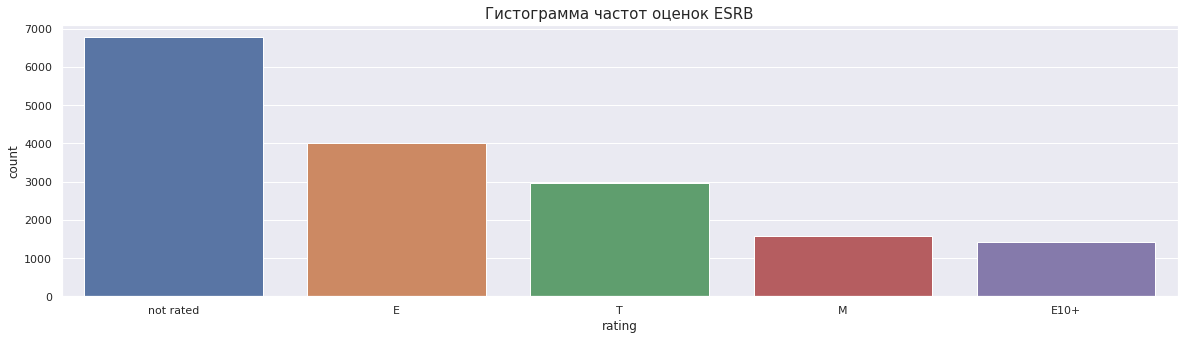

In [38]:
plt.figure(figsize=(20, 5))
sns.set()
sns.countplot(data=games, x='rating', order=games['rating'].value_counts().index)
plt.title('Гистограмма частот оценок ESRB', fontsize=15)
plt.show()

In [39]:
games['rating'].value_counts()

not rated    6767
E            4001
T            2961
M            1564
E10+         1420
Name: rating, dtype: int64

<b>суммарные продажи во всех регионах</b>

In [40]:
games.insert(8, 'total_sales', games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'])

In [41]:
games['total_sales'].describe()

count   16,713.00
mean         0.53
std          1.55
min          0.00
25%          0.06
50%          0.17
75%          0.47
max         82.54
Name: total_sales, dtype: float64

In [42]:
games.loc[games['total_sales'] == 0, 'total_sales'].count()

2

Нулевых записей всего две. Так как это один из целевых признаков, то удаляем их

In [43]:
games = games.loc[games['total_sales'] != 0]

In [44]:
games['total_sales'].describe()

count   16,711.00
mean         0.53
std          1.55
min          0.01
25%          0.06
50%          0.17
75%          0.47
max         82.54
Name: total_sales, dtype: float64

Среднее значение составляет 0.53, а медиана - 0.17. Данные сильно скошены вправо. Нормальные значения находятся до (0.47-0.06)*1.5+0.47 = 1.085. Большинство игр в продаются чуть больше чем 1млн. копий, но гиперпопулярные игры сильно смещают данные на себя.

In [45]:
print('Доля выбросов в мире в общей выборке: ', 
      round(len(games[games['total_sales'] > 1.085]) / len(games['total_sales']) * 100, 1), '%')

Доля выбросов в мире в общей выборке:  11.3 %


<b>Вывод по шагу 2:</b>
- Кол-во уникальных игр: 11560
- Кол-во уникальных платформ: 31
- Изменены типы данных в столбцах на более подходящие
- Игры до 1990 года выпуска почти не представлены в выборке. Основная часть вышла с 2000-2010 годы.
- Кол-во уникальных жанров: 12. Самые популярные жанры в выборке - экшн и спорт
- Данные по продажам сильно скошены из-за гиперпопулярных игр. Процент выбросов от 10 до 15%. Большое кол-во игр с нулевыми продажами. Добавлен столбец с общими продажами по всему миру
- Оценки критиков и игроков в целом нормально распределены
- Рейтинги критиков скомпановы в более крупные группы

# Шаг 3. Исследовательский анализ данных

<b>Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?</b>

In [46]:
games.groupby(by='year_of_release')['platform'].count().sort_values(ascending=False)

year_of_release
2009    1426
2008    1425
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: platform, dtype: int64

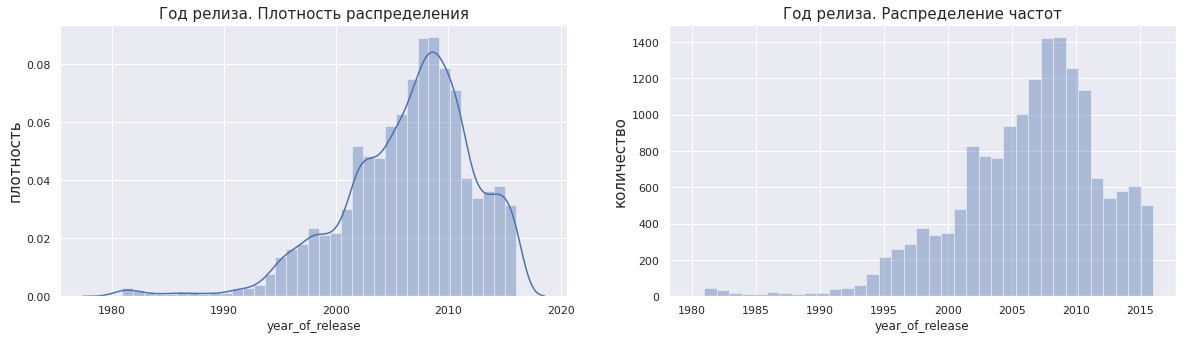

In [47]:
show_hists(games.loc[games['year_of_release'] > 0, 'year_of_release'], 
           'Год релиза', num_bins=37)

<b>Вывод: </b>Все года, в которых меньше 100 выпущенных игр можно исключить из анализа. Получается все года c 1994

<b>Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?</b>

In [48]:
top_platforms = (games
                 .groupby('platform')['total_sales']
                 .agg('sum')
                 .sort_values(ascending=False)
                 .reset_index()
                 .head(20)['platform'])
top_platforms

0      PS2
1     X360
2      PS3
3      Wii
4       DS
5       PS
6      GBA
7      PS4
8      PSP
9       PC
10     3DS
11      XB
12      GB
13     NES
14     N64
15    SNES
16      GC
17    XOne
18    2600
19    WiiU
Name: platform, dtype: object

Доминирование платформ от Sony вполне очевидно

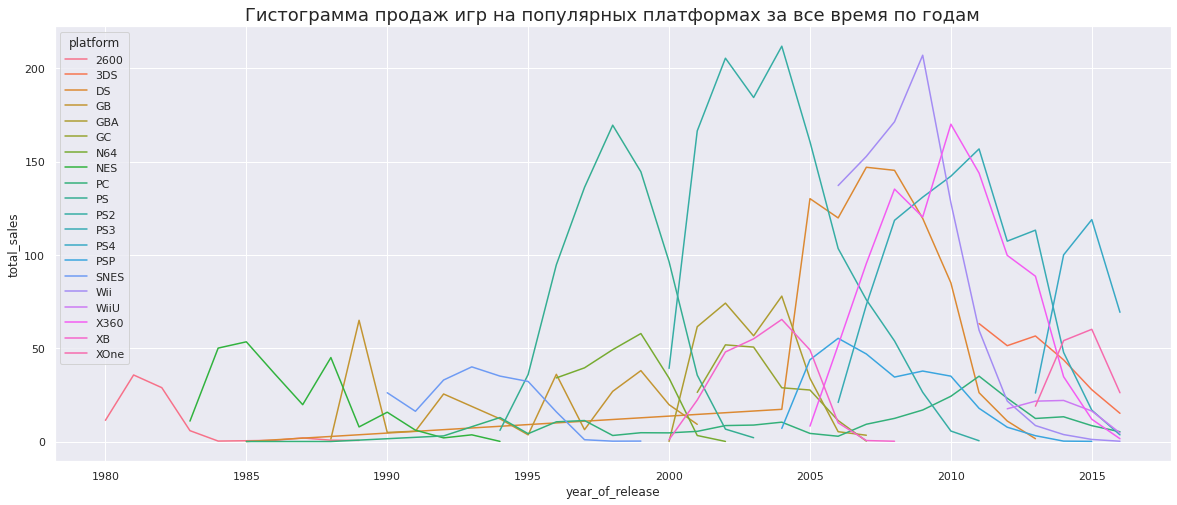

In [49]:
plt.figure(figsize=(20,8))
plt.title('Гистограмма продаж игр на популярных платформах за все время по годам', fontsize=18)
sns.lineplot(x='year_of_release', 
             y='total_sales', 
             hue='platform', 
             markers=True, 
             data=(games.query('platform in @top_platforms')
                   .groupby(['platform', 'year_of_release'])['total_sales']
                   .agg('sum')
                   .reset_index()));

Из гистограммы видно, что характерный срок выпуска игр для платформ составляет примерно 10 лет

<b>Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.</b>

Основные факторы для выбора дальнейшей выборки:
- исследовать платформы, для которых уже не выпускают игры бессмыслено
- актуальный период 2006-2016

In [50]:
current_platforms = games.loc[games['year_of_release'] == 2016, 'platform'].unique()
print('Список платформ, для которых выпускают игры в 2016 году: ', *current_platforms)

Список платформ, для которых выпускают игры в 2016 году:  PS4 3DS XOne WiiU PS3 PC X360 PSV Wii


In [51]:
good_games = games.query('platform in @top_platforms and platform in @current_platforms')

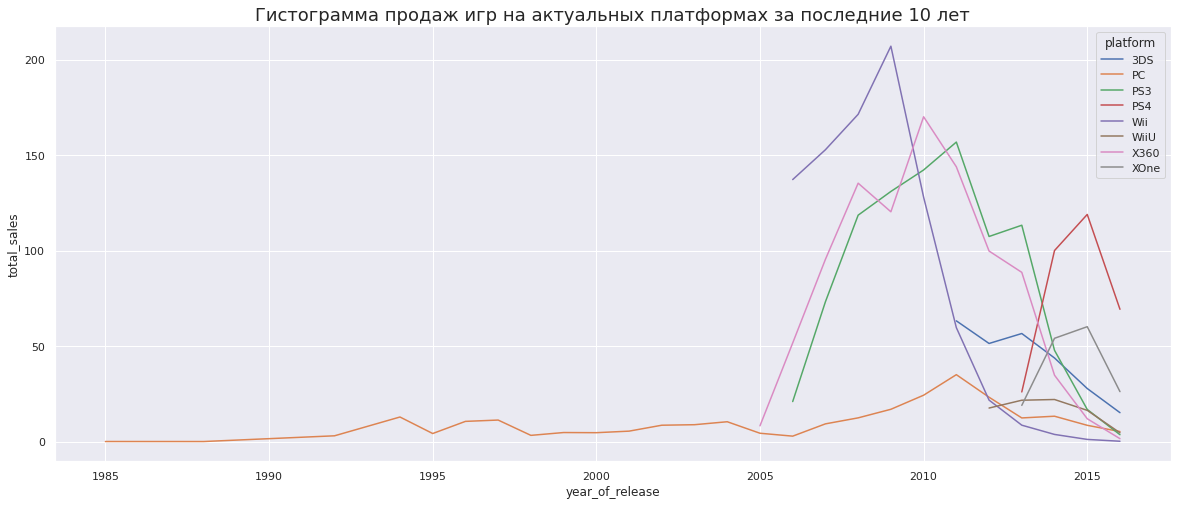

In [52]:
plt.figure(figsize=(20,8))
plt.title('Гистограмма продаж игр на актуальных платформах за последние 10 лет', fontsize=18)
sns.lineplot(x='year_of_release', 
             y='total_sales', 
             hue='platform', 
             markers=True, 
             data=(good_games
                   .groupby(['platform', 'year_of_release'])['total_sales']
                   .agg('sum')
                   .reset_index()));

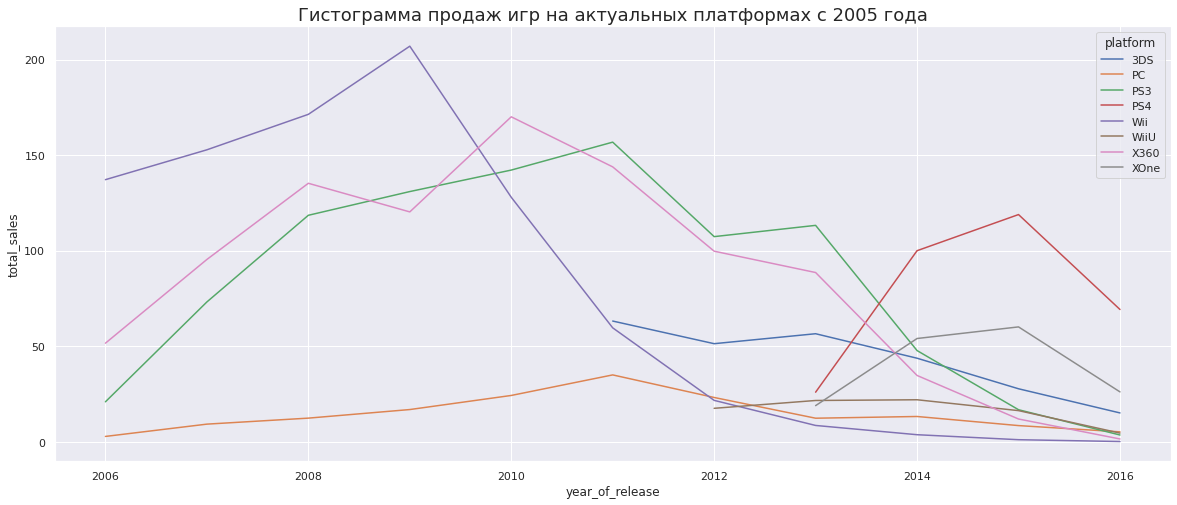

In [53]:
plt.figure(figsize=(20,8))
plt.title('Гистограмма продаж игр на актуальных платформах c 2005 года', fontsize=18)
sns.lineplot(x='year_of_release', 
             y='total_sales', 
             hue='platform', 
             markers=True, 
             data=(good_games
                   .query('year_of_release > 2005')
                   .groupby(['platform', 'year_of_release'])['total_sales']
                   .agg('sum')
                   .reset_index()));

Учитывать в прогозе по продажам игр в 2017 году игры для устаревших платформ таких как PS3, X360 нет смысла. В актуальных платформах для анализа оставляем: PS4, 3DS, XOne, WiiU, PC. Актуальный период с 2006 подтвердился по графикам выше. Построим обновленную гистограмму продаж для актуальных платформ

In [54]:
actual_platform = ['PS4', '3DS', 'XOne', 'WiiU', 'PC']

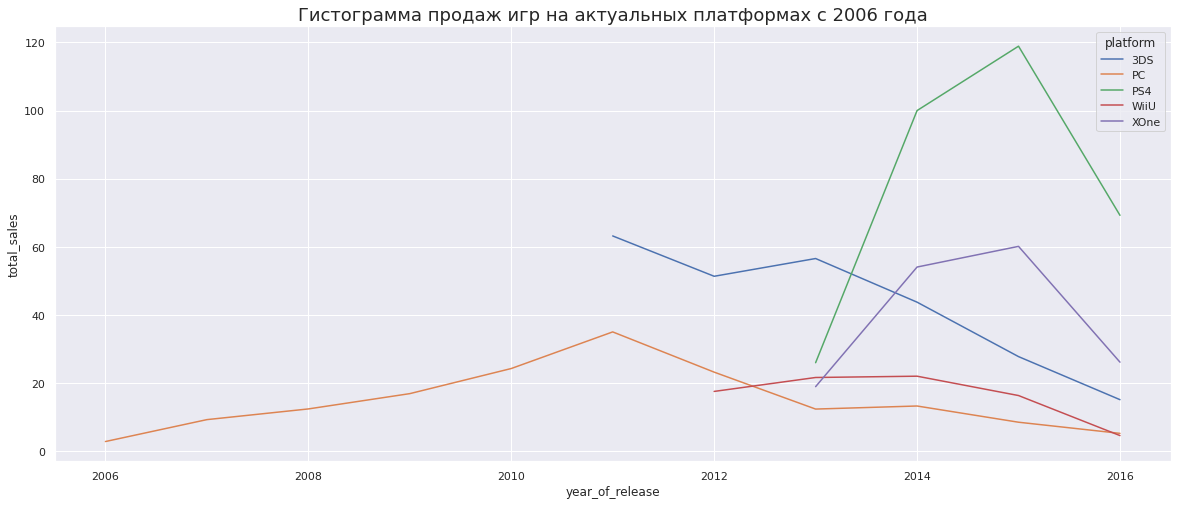

In [55]:
plt.figure(figsize=(20,8))
plt.title('Гистограмма продаж игр на актуальных платформах c 2006 года', fontsize=18)
sns.lineplot(x='year_of_release', 
             y='total_sales', 
             hue='platform', 
             markers=True, 
             data=(good_games
                   .query('year_of_release > 2005 and platform in @actual_platform')
                   .groupby(['platform', 'year_of_release'])['total_sales']
                   .agg('sum')
                   .reset_index()));

Обновляем текущую таблицу согласно полученным ограниченниям, актуальный период имеет смысл сместить до 2010 года

In [56]:
good_games = good_games.query('platform in @actual_platform and year_of_release >= 2010')

<b>Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.</b>

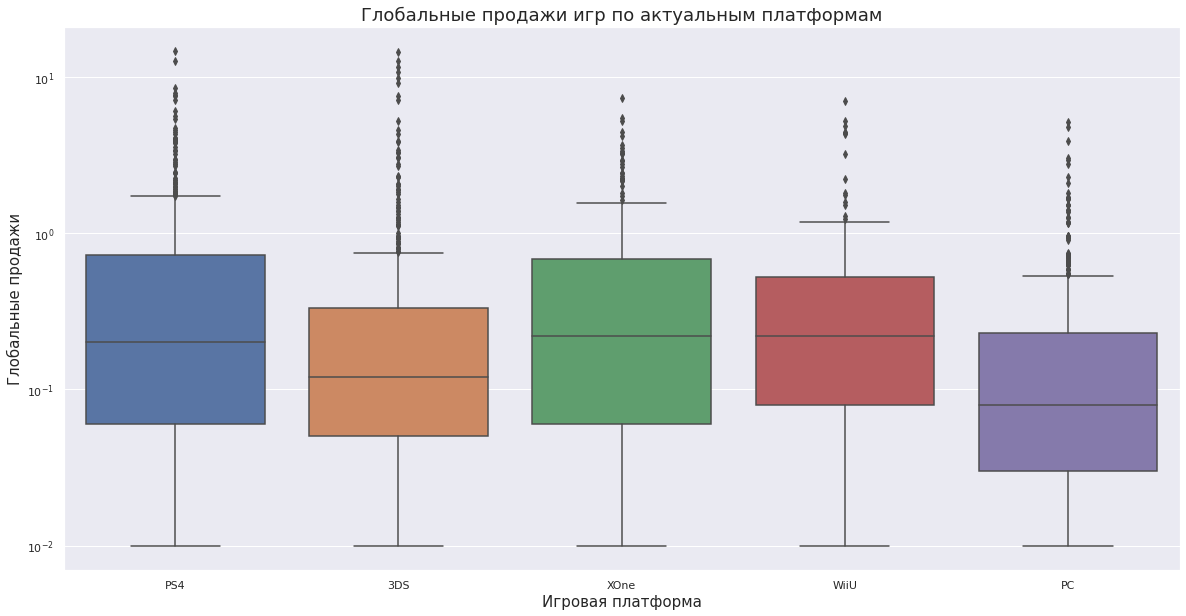

In [57]:
plt.figure(figsize=(20, 10))
sns.set()
ax = sns.boxplot(data=good_games, y='total_sales', x='platform')
ax.set_title('Глобальные продажи игр по актуальным платформам', fontsize=18)
ax.set_xlabel('Игровая платформа', fontsize=15)
ax.set_ylabel('Глобальные продажи', fontsize=15)
ax.set(yscale='log')
plt.show()

In [58]:
for item in actual_platform:
    print(item)
    print(games.loc[games['platform'] == item]['total_sales'].describe())
    print()

PS4
count   392.00
mean      0.80
std       1.61
min       0.01
25%       0.06
50%       0.20
75%       0.73
max      14.63
Name: total_sales, dtype: float64

3DS
count   520.00
mean      0.50
std       1.43
min       0.01
25%       0.05
50%       0.12
75%       0.33
max      14.60
Name: total_sales, dtype: float64

XOne
count   247.00
mean      0.65
std       1.04
min       0.01
25%       0.06
50%       0.22
75%       0.69
max       7.39
Name: total_sales, dtype: float64

WiiU
count   147.00
mean      0.56
std       1.06
min       0.01
25%       0.08
50%       0.22
75%       0.53
max       7.09
Name: total_sales, dtype: float64

PC
count   974.00
mean      0.27
std       0.68
min       0.01
25%       0.02
50%       0.05
75%       0.17
max       8.01
Name: total_sales, dtype: float64



<b>Выводы о глобальных продажах игр на актуальных платформах:<b/>
- Во всех представленных локациях, платформах наблюдаются сильные выбросы гиперпопулярных игр. Как указывалось выше процент таких выбросов от 10 до 15%
- Медианные значения глобальных продаж PS4, XOne, WiiU примерно одинаковы - 200тыс. копий.
- Наиболее подвержены выбросам наиболее популярные платформы - PS4, XOne
- Наиболее стабильная платформа по продажам - PC. По графикам шага 2 за весь период представленный в выборке низкие, но стабильные продажи и до 2016 года платформа не потеряла своей актуальности, хотя о гиперпродажах на ней говорить нет смысла.

<b>Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Соотнесите выводы с продажами игр на других платформах. Сформулируйте выводы.</b>

Оценим влияние на продажи от отзывов пользователей и критиков на платформе PS4

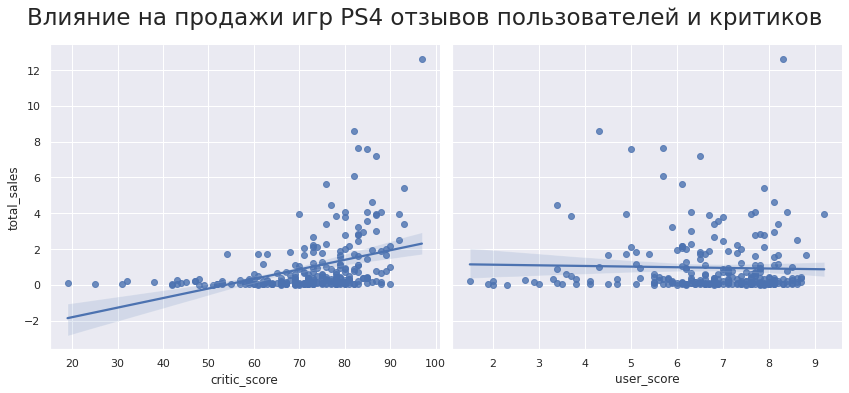

In [59]:
games_ps4 = good_games.loc[good_games['platform'] == 'PS4']
games_ps4['critic_score'] = games_ps4['critic_score'].astype('float64')
sns.set()
ax = sns.pairplot(games_ps4, 
                  x_vars=['critic_score', 'user_score'], 
                  y_vars=['total_sales'], 
                  height=5, 
                  aspect=1.2, 
                  kind='reg')
ax.fig.suptitle('Влияние на продажи игр PS4 отзывов пользователей и критиков', 
                y=1.08, 
                size=23)
plt.show()

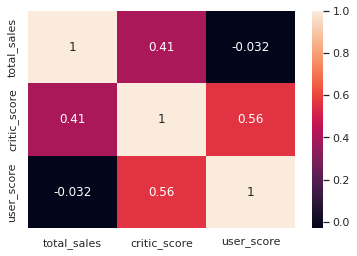

In [60]:
sns.heatmap(games_ps4[['total_sales', 'critic_score', 'user_score']].corr(), annot=True);

In [61]:
(good_games
 .groupby(['platform'])
 [['total_sales', 'critic_score', 'user_score']]
 .agg('corr')
 .reset_index()
 .query('level_1 == "total_sales"'))

,platform,level_1,total_sales,critic_score,user_score
0,3DS,total_sales,1.00,0.35,0.22
3,PC,total_sales,1.00,0.34,-0.01
6,PS4,total_sales,1.00,0.41,-0.03
9,WiiU,total_sales,1.00,0.35,0.40
12,XOne,total_sales,1.00,0.42,-0.07


<b>Промежуточные выводы о влиянии отзывов на продажи на платформе PS4:</b>
- умеренная корреляция существует между отзываму критиков и продажами игр (коэф 0.41)
- корреляция между оценками пользователей и продажами игр отсутствует (коэф -0.032)

Также стоит отметить, что в данном случае влияние выбросов должно быть незначительно, так как их кол-во не критическое

При анализе влияния отзывов на других платформах итоги в целом совпадают с описанным выше. Исключение составляют платформы 3DS и WiiU с коэф. корр. продаж и оценок игроков в 0.22 и 0.40 соответственно.

Из графиков и таблиц выше для платформ 3DS и WiiU одинаковое влияние оказывают и оценки критиков и пользователей. Для остальных основное влияние оказывают отзывы критиков

<b>Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?</b>

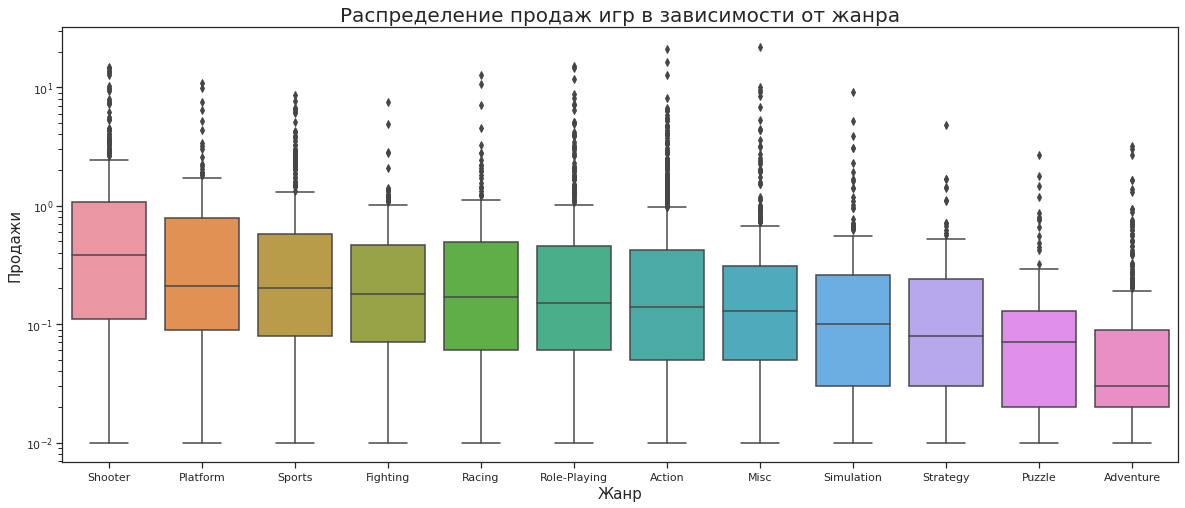

In [62]:
genre_sort = (games
              .query('year_of_release >= 2010')
              .groupby('genre')['total_sales']
              .agg('median')
              .sort_values(ascending=False)
              .index)
plt.figure(figsize=(20, 8))
sns.set(style='ticks')
ax = sns.boxplot(data=games.query('year_of_release >= 2010'), 
                 y='total_sales', 
                 x='genre', 
                 order=genre_sort)
ax.set_title('Распределение продаж игр в зависимости от жанра', fontsize=20)
ax.set_xlabel('Жанр', fontsize=15)
ax.set_ylabel('Продажи', fontsize=15)
ax.set(yscale='log')
plt.show()

In [63]:
(games
 .query('year_of_release >= 2010')
 .groupby('genre')['total_sales']
 .agg('median')
 .sort_values(ascending=False))

genre
Shooter        0.39
Platform       0.21
Sports         0.20
Fighting       0.18
Racing         0.17
Role-Playing   0.15
Action         0.14
Misc           0.13
Simulation     0.10
Strategy       0.08
Puzzle         0.07
Adventure      0.03
Name: total_sales, dtype: float64

<b>Промежуточные выводы о распределении продаж в зависимости от жанра игр:</b>
- Уровень продаж самый высокий у шутеров (в среднем 390тыс. по всем платформам), затем идут платформеры, спортивные и файтинги (в среднем по 200тыс каждый жанр на всех платформах.
- Аутсайдеры: пазлы, приключения и стратегии

<b>Выводы по шагу 3</b>
- до 1994 представлено очень мало игр
- в продажах игр за последнее время прослеживается доминирование платформ от Sony
- харатерное время выпуска для платформ сотавляет около 10 лет
- с учетом платформ сохраняющих актуальность в 2016 году, актуальный период для оценки 2010-2016гг
- при анализе продаж на всех платформах прослеживаются выбросы от гиперпопулярных игр, составляющие 10-15%. Наиболее подвержены выбросам PS4 и XOne. Наиболее стабильная платформа PC, но продажи на ней не могут похвастаться объемами.
- по всем платформам прослеживается средняя корреляция между продажами и оценками критиков. На платформах 3DS и WiiU также есть корреляция с оценками пользователей
- при анализе жанров самые популярные: шутеры, платформеры, спортивные и ролевые. Наименьшие продажи у пазлов, стратегий и приключений

# Шаг 4. Портрет пользователя каждого региона

<b>Составьте портрет пользователя каждого региона. Определите для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Опишите различия в долях продаж. Самые популярные жанры (топ-5). Поясните разницу. Влияет ли рейтинг ESRB на продажи в отдельном регионе?</b>

In [64]:
def res(platform):
    sales = (games
             .loc[(games['platform'] == platform['platform']) & 
                   (games['year_of_release'] >= 2010)]
             ['total_sales']
             .sum() / 
             good_games['total_sales']
             .sum())
    return sales

In [65]:
print('Продажи в Северной Америке')
df_sales_na = (games.loc[games['year_of_release'] >= 2010].groupby('platform')
      .agg({'na_sales':'sum'})
      .sort_values(by='na_sales', 
                   ascending=False))

df_sales_na['part'] = round(df_sales_na['na_sales']/df_sales_na['na_sales'].sum(),3)
df_sales_na = df_sales_na.reset_index()
df_sales_na['world'] = df_sales_na.apply(res, axis=1)
display(df_sales_na)

Продажи в Северной Америке


,platform,na_sales,part,world
0,X360,334.18,0.30,0.59
1,PS3,229.25,0.20,0.63
2,Wii,121.20,0.11,0.24
3,PS4,108.74,0.10,0.34
4,XOne,93.12,0.08,0.17
5,3DS,82.65,0.07,0.28
6,DS,59.66,0.05,0.13
7,PC,39.07,0.04,0.13
8,WiiU,38.10,0.03,0.09
9,PSV,12.47,0.01,0.06


In [66]:
print('Топ жанров в Северной Америке')
(games
 .query('year_of_release >= 2010')
 .pivot_table(index='genre', 
              values=['na_sales'], 
              aggfunc='sum')
 .sort_values(by='na_sales', 
              ascending=False)).head()

Топ жанров в Северной Америке


,na_sales
genre,
Action,290.64
Shooter,237.47
Sports,156.81
Misc,123.80
Role-Playing,112.05


In [67]:
print('Продажи в Европе')
df_sales_eu = (games.loc[games['year_of_release'] >= 2010].groupby('platform')
      .agg({'eu_sales':'sum'})
      .sort_values(by='eu_sales', 
                   ascending=False))

df_sales_eu['part'] = round(df_sales_eu['eu_sales']/df_sales_eu['eu_sales'].sum(),3)
df_sales_eu = df_sales_eu.reset_index()
df_sales_eu['world'] = df_sales_eu.apply(res, axis=1)
display(df_sales_eu)

Продажи в Европе


,platform,eu_sales,part,world
0,PS3,213.60,0.25,0.63
1,X360,163.41,0.19,0.59
2,PS4,141.09,0.17,0.34
3,PC,68.82,0.08,0.13
4,Wii,65.91,0.08,0.24
5,3DS,61.27,0.07,0.28
6,XOne,51.59,0.06,0.17
7,DS,28.06,0.03,0.13
8,WiiU,25.13,0.03,0.09
9,PSV,13.07,0.02,0.06


In [68]:
print('Топ жанров в Европе')
(games
 .query('year_of_release >= 2010')
 .pivot_table(index='genre', 
              values=['eu_sales'], 
              aggfunc='sum')
 .sort_values(by='eu_sales', 
              ascending=False)).head()

Топ жанров в Европе


,eu_sales
genre,
Action,233.63
Shooter,171.45
Sports,116.84
Role-Playing,75.48
Misc,66.09


In [69]:
print('Продажи в Японии')
df_sales_jp = (games.loc[games['year_of_release'] >= 2010].groupby('platform')
      .agg({'jp_sales':'sum'})
      .sort_values(by='jp_sales', 
                   ascending=False))

df_sales_jp['part'] = round(df_sales_jp['jp_sales']/df_sales_jp['jp_sales'].sum(),3)
df_sales_jp = df_sales_jp.reset_index()
df_sales_jp['world'] = df_sales_jp.apply(res, axis=1)
display(df_sales_jp)

Продажи в Японии


,platform,jp_sales,part,world
0,3DS,100.62,0.33,0.28
1,PS3,59.26,0.19,0.63
2,PSP,42.20,0.14,0.07
3,DS,27.90,0.09,0.13
4,PSV,21.84,0.07,0.06
5,Wii,17.75,0.06,0.24
6,PS4,15.96,0.05,0.34
7,WiiU,13.01,0.04,0.09
8,X360,5.46,0.02,0.59
9,PS2,0.80,0.00,0.01


In [70]:
print('Топ жанров в Японии')
(games
 .query('year_of_release >= 2010')
 .pivot_table(index='genre', 
              values=['jp_sales'], 
              aggfunc='sum')
 .sort_values(by='jp_sales', 
              ascending=False)).head()

Топ жанров в Японии


,jp_sales
genre,
Role-Playing,103.54
Action,72.20
Misc,24.29
Platform,15.81
Adventure,15.67


In [71]:
def var(item):
    return round(item / float(item.sum()), 2)

In [72]:
print('Распределение игр по рейтингам в локациях')
(games
 .query('year_of_release >= 2010')
 .groupby('rating')
 [['na_sales', 'eu_sales', 'jp_sales']]
 .agg('sum')
 .apply(var))

Распределение игр по рейтингам в локациях


,na_sales,eu_sales,jp_sales
rating,,,
E,0.24,0.23,0.16
E10+,0.14,0.12,0.04
M,0.34,0.35,0.10
T,0.14,0.13,0.14
not rated,0.14,0.17,0.56


<b>Выводы по шагу 4</b>
- Предпочтения по платформам в ТОП у Америки и Европы схожи. Доминируют платформы Sony  и Xbox. Но также в топе в Америке появилась платформа Wii, а в Европе PC. В Японии рынок популярных платформ иной. Доминируют платформы Sony и DS
- По топу жанров Северная Америка схожа с Европой. Доминируют экшн, шутер, спортивные. В Японии как и в других локациях популярны ролевые и экшн, но также у них популярны платформеры, симуляторы и музыкальные игры (видимо специфика региона)
- Влияние рейтингов M и Е в Северной Америке и Европе. Процент игр без указания рейтинга примерно 15%. В Японии очении большой процент без указания рейтинга - почти 60%. В остальных продажах доминируют игры рейтинга Е.

В Японии ожидаемо более развиты свои специфичные платформы, чем в остальном мире. Также существуют различия в жанрах

# Шаг 5. Проверка гипотез

<b>Проверьте гипотезу
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
</b>

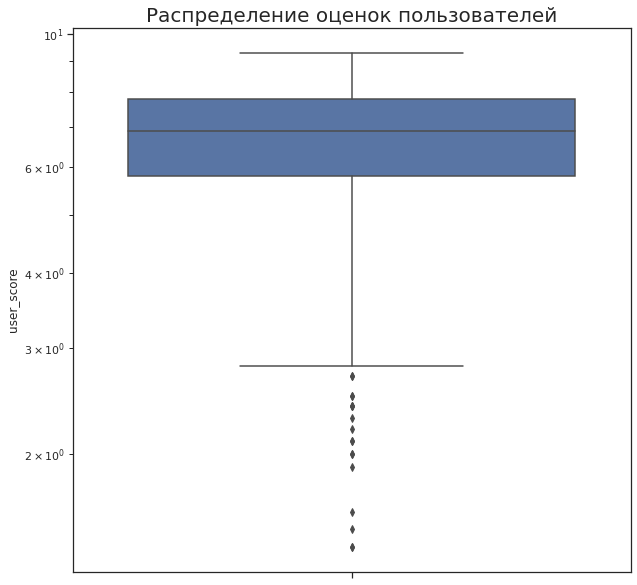

In [73]:
plt.figure(figsize=(10, 10))
sns.set(style='ticks')
ax = sns.boxplot(data=good_games, y='user_score')
ax.set_title('Распределение оценок пользователей', fontsize=20)
ax.set(yscale='log')
plt.show()

In [74]:
good_games['user_score'].describe()

count   1,084.00
mean        6.66
std         1.48
min         1.40
25%         5.80
50%         6.90
75%         7.80
max         9.30
Name: user_score, dtype: float64

In [75]:
print('Нижняя граница нормальных значений:', 5.8 - (7.8 - 5.8) * 1.5)

Нижняя граница нормальных значений: 2.8


In [76]:
print('Доля выбросов минимальных пользовательских оценок: ', 
      round(len(good_games[good_games['user_score'] < 2.8]) / len(good_games['user_score']) * 100, 1), '%')

Доля выбросов минимальных пользовательских оценок:  1.0 %


Доля минимальных оценок составляет 1% от общего объема. Можем ее спокойно удалить

In [77]:
good_games = good_games.loc[(good_games['user_score'].isna()) | (good_games['user_score'] > 2.8)]

Проверяем гипотезу : Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: Средний пользовательский рейтинг на платформе Xbox One равен среднему пользовательскому рейтингу на платформе PC

Альтернаятивная гипотеза: Средний пользовательский рейтинг на платформе Xbox One не равен среднему пользовательскому рейтингу на платформе PC

Так как выборки для обоих платформ не связаны друг с другом, то выбираем расчет для несвязных выборок

In [78]:
# данные для XOne
good_games_xone = good_games.loc[(good_games['platform'] == 'XOne') &
                              (~good_games['user_score'].isna()), 
                              'user_score']

In [79]:
# данные для PC
good_games_pc = good_games.loc[(good_games['platform'] == 'PC') &
                              (~good_games['user_score'].isna()), 
                              'user_score']

Сравнительная оценка дисперсий двух выборок для выбора значения equal_var

In [80]:
print(np.var(good_games_xone, ddof=1))
print(len(good_games_xone))

1.6810726256983242
180


In [81]:
print(np.var(good_games_pc, ddof=1))
print(len(good_games_pc))

2.108105745894195
367


In [82]:
alpha = .05

result = st.ttest_ind(
    good_games_pc,
    good_games_xone,
    # дисперсии считаем отдельно, так как размеры выборок разные и дисперсии у них разные
    equal_var = False 
)

print('p-значение: ', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.8092668125481814
Не получилось отвергнуть нулевую гипотезу


Вывод: р-значение = 0.8. Отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые не получилось

<b>Проверьте гипотезу
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
</b>

Проверяем гипотезу : Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны

Альтернаятивная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не равны

Так как выборки для обоих платформ не связаны друг с другом, то выбираем расчет для несвязных выборок

In [83]:
# данные для Action
good_games_action = good_games.loc[(good_games['genre'] == 'Action') &
                              (~good_games['user_score'].isna()), 'user_score']

In [84]:
# данные для Sport
good_games_sports = good_games.loc[(good_games['genre'] == 'Sports') &
                              (~good_games['user_score'].isna()), 'user_score']

Сравнительная оценка дисперсий двух выборок для выбора значения equal_var

In [85]:
print(np.var(good_games_action, ddof=1))
print(len(good_games_action))

1.5558024466423737
340


In [86]:
print(np.var(good_games_sports, ddof=1))
print(len(good_games_sports))

1.6703738317757009
108


In [87]:
alpha = .05

result = st.ttest_ind(
    good_games_action,
    good_games_sports,
    # дисперсии считаем отдельно, так как размеры выборок разные и дисперсии у них разные
    equal_var = False 
)

print('p-значение: ', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  4.181187827144991e-09
Отвергаем нулевую гипотезу


Вывод: р-значение = 0. Данное значает позволяет нам отвергнуть нулевую гипотезу в пользу альтернативной

<b>Выводы по шагу 5:</b>
- Средняя пользовательская оценка игр на платформе Xbox One равна средней пользовательской оценке игр на платформе PC
- Средняя пользовательская оценка игр жанра Action не равна средней пользовательской оценке игр жанра Sports

# Шаг 6

# Общий вывод

- Всего записей - 16715 шт.
- Кол-во уникальных игр: 11560
- Кол-во уникальных платформ: 31
- Игры до 1990 года выпуска почти не представлены в выборке. Основная часть вышла с 2000-2010 годы.
- Кол-во уникальных жанров: 12. Самые популярные жанры в выборке - экшн и спорт
- Данные по продажам сильно скошены из-за гиперпопулярных игр. Процент выбросов от 10 до 15%. Большое кол-во игр с нулевыми продажами. Добавлен столбец с общими продажами по всему миру
- Оценки критиков и игроков в целом нормально распределены
- Рейтинги критиков скомпановы в более крупные группы


- до 1994 представлено очень мало игр
- в продажах игр за последнее время прослеживается доминирование платформ от Sony
- харатерное время выпуска для платформ сотавляет около 10 лет
- с учетом платформ сохраняющих актуальность в 2016 году, актуальный период для оценки 2010-2016гг
- при анализе продаж на всех платформах прослеживаются выбросы от гиперпопулярных игр, составляющие 10-15%. Наиболее подвержены выбросам PS4 и XOne. Наиболее стабильная платформа PC, но продажи на ней не могут похвастаться объемами.
- по всем платформам прослеживается средняя корреляция между продажами и оценками критиков. На платформах 3DS и WiiU также есть корреляция с оценками пользователей
- при анализе жанров самые популярные: шутеры, платформеры, спортивные и ролевые. Наименьшие продажи у пазлов, стратегий и приключений


- PS4 входит в топ-3 во всех локациях по продажам. Также в зависимости от локации есть свои фавориты: для Северной Америки XOne, для Европы PC, для Японии 3DS и WiiU.
- По топу жанров Северная Америка схожа с Европой. Доминируют экшн, шутер, ролевые, спортивные. В Японии как и в других локациях популярны ролевые и экшн, но также у них популярны платформеры, симуляторы и музыкальные игры (видимо специфика региона)
- Влияние рейтингов M и Е в Северной Америке и Европе. Процент игр без указания рейтинга примерно 20%. В Японии очении большой процент без указания рейтинга - почти 60%. В остальных продажах доминируют игры рейтинга Е.


- Средняя пользовательская оценка игр на платформе Xbox One равна средней пользовательской оценке игр на платформе PC
- Средняя пользовательская оценка игр жанра Action не равна средней пользовательской оценке игр жанра Sports